In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Lead_Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# To fill null values in TotalVisits and Page Views Per Visit

# Step 1: Calculate the mean for converted leads
mean_total_visits_converted = df[df['Converted'] == 1]['TotalVisits'].mean()
mean_page_views_converted = df[df['Converted'] == 1]['Page Views Per Visit'].mean()

# Step 2: Calculate the mean for not converted leads
mean_total_visits_not_converted = df[df['Converted'] == 0]['TotalVisits'].mean()
mean_page_views_not_converted = df[df['Converted'] == 0]['Page Views Per Visit'].mean()

# Step 3: Fill null values in TotalVisits and Page Views Per Visit
df.loc[(df['Converted'] == 1) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_converted
df.loc[(df['Converted'] == 1) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_converted

df.loc[(df['Converted'] == 0) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_not_converted
df.loc[(df['Converted'] == 0) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_not_converted

# Optional: Check if there are any remaining null values
print("Remaining null values in TotalVisits:", df['TotalVisits'].isnull().sum())
print("Remaining null values in Page Views Per Visit:", df['Page Views Per Visit'].isnull().sum())

Remaining null values in TotalVisits: 0
Remaining null values in Page Views Per Visit: 0


  Time Spent  Leads  Converted  Not Converted  Conversion Ratio
3  1501-2000    575        411            164             71.48
2  1001-1500   1528       1053            475             68.91
4      2000+     22         15              7             68.18
1   501-1000   1042        599            443             57.49
0      0-500   6073       1483           4590             24.42


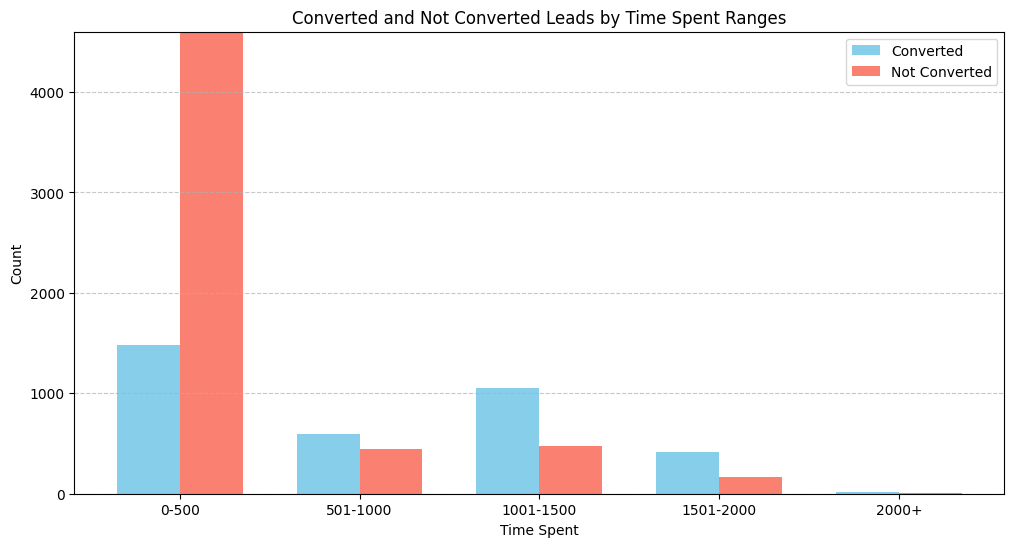

In [4]:
# Hypothesis: If a non-paying customer has spent time on website greater than 500 then he can be converted to paying customer

bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges

# Create a new column for visit ranges
df['Time Spent'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)

# print(df['Visit Range'])

# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Time Spent'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Time Spent'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Time Spent'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the summary DataFrame to check the counts
print(summary_df_sorted)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Adding labels and title
plt.title('Converted and Not Converted Leads by Time Spent Ranges')  # Title of the plot
plt.xlabel('Time Spent')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Time Spent'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

In [5]:
converted = df[df['Converted'] == 1]
not_converted = df[df['Converted']==0]
print('Total Visits')
print('Converted - Mean : ',converted['TotalVisits'].mean())
print('Not converted - Mean : ' ,not_converted['TotalVisits'].mean())

print('Converted - Max: ',converted['TotalVisits'].max())
print('Not converted - Max : ' ,not_converted['TotalVisits'].max())

print('Converted - Min : ',converted['TotalVisits'].min())
print('Not converted - Min : ' ,not_converted['TotalVisits'].min())

Total Visits
Converted - Mean :  3.63363189829529
Not converted - Mean :  3.32967032967033
Converted - Max:  251.0
Not converted - Max :  141.0
Converted - Min :  0.0
Not converted - Min :  0.0


  Visit Range  Leads  Converted  Not Converted  Conversion Ratio
0         0-5   7610       2863           4747             37.62
1        6-10   1277        533            744             41.74
2       11-15    233        117            116             50.21
3       16-20     73         28             45             38.36
4         20+     47         20             27             42.55


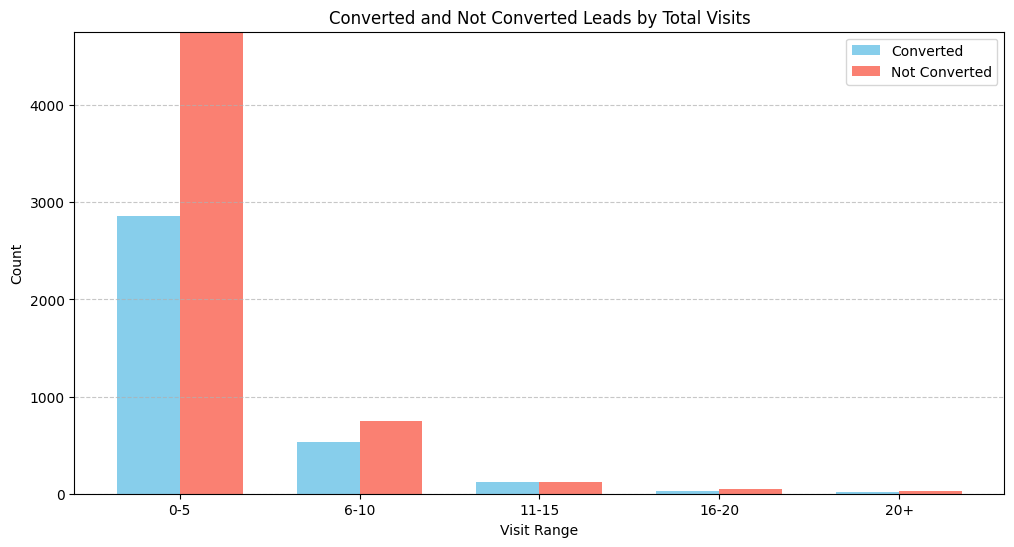

In [6]:
# Hypothesis : If a not paying customer has more visits then he might not be converted to paying customer

# Define visit ranges as specified
bins = [0, 6, 11, 16, 21, float('inf')]  # Define the ranges
labels = ['0-5', '6-10', '11-15', '16-20', '20+']  # Labels for the ranges

# Create a new column for visit ranges
df['Visit Range'] = pd.cut(df['TotalVisits'], bins=bins, labels=labels, right=False)

# Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Visit Range'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the summary DataFrame to check the counts
print(summary_df)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Adding labels and title
plt.title('Converted and Not Converted Leads by Total Visits')  # Title of the plot
plt.xlabel('Visit Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Visit Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
 
plt.show()  # Display the plot

In [7]:
# unique_tags = df['Tags'].unique()
# print(len(unique_tags))


tag_counts = df.groupby('Tags')['Converted'].value_counts().unstack(fill_value=0)

# Step 2: Rename the columns for clarity
tag_counts.columns = ['Not Converted', 'Converted']

# Step 3: Print the counts
print(tag_counts)

                                                   Not Converted  Converted
Tags                                                                       
Already a student                                            462          3
Busy                                                          81        105
Closed by Horizzon                                             2        356
Diploma holder (Not Eligible)                                 62          1
Graduation in progress                                       104          7
In confusion whether part time or DLP                          4          1
Interested  in full time MBA                                 114          3
Interested in Next batch                                       0          5
Interested in other courses                                  500         13
Lateral student                                                0          3
Lost to EINS                                                   4        171
Lost to Othe

In [8]:
converted[converted['Tags']=='Interested in other courses']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Time Spent
407,cd34872c-0078-4b7b-809a-309bd99c6603,656126,API,Organic Search,No,No,1,4.0,1341,2.00,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1001-1500
795,2b8ff598-58ef-40af-b2ee-c734f844c965,652085,Landing Page Submission,Google,No,No,1,9.0,1342,3.00,...,Select,Mumbai,02.Medium,01.High,14.0,18.0,No,No,Email Link Clicked,1001-1500
833,f5fff4f3-2de4-4176-967f-d8e50e25ab29,651680,API,Olark Chat,No,No,1,0.0,0,0.00,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0-500
1089,54d8b3a3-d847-4888-9a9e-39720a56a775,648386,API,Referral Sites,No,No,1,4.0,1521,4.00,...,Select,Select,02.Medium,02.Medium,14.0,13.0,No,No,SMS Sent,1501-2000
1646,b8b36555-9605-465d-839a-970f30537f47,643263,API,Google,No,No,1,2.0,925,2.00,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,501-1000
4539,bb0abb6c-8f95-45df-beb3-d93b8bafb011,616143,API,Olark Chat,No,No,1,0.0,0,0.00,...,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent,0-500
4944,84102379-07f4-4ce3-9e9c-94cb3c029db6,612603,API,Google,No,No,1,2.0,979,2.00,...,Other Leads,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent,501-1000
5021,bfb6a80e-ac5f-45df-a40f-0f76158768b1,611651,API,Google,No,No,1,2.0,1260,2.00,...,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent,1001-1500
5361,d6a3cb74-6302-4fb5-856b-76717e820eef,608727,API,Olark Chat,No,No,1,0.0,0,0.00,...,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent,0-500
5433,aa27a0af-eeab-4007-a770-fa8a93fa53c8,608251,API,Google,No,No,1,2.0,39,2.00,...,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent,0-500


In [9]:
# # Step 1: Separate the DataFrame into converted and unconverted leads
# converted_leads = df[df['Converted'] == 1]  # Assuming 1 indicates converted
# unconverted_leads = df[df['Converted'] == 0]  # Assuming 0 indicates not converted

# Step 2: Calculate correlation for converted leads
converted_correlation = converted.corr()

# Step 3: Calculate correlation for unconverted leads
unconverted_correlation = unconverted.corr()

# Step 4: Print the correlation matrices
print("Correlation matrix for Converted Leads:")
print(converted_correlation)

print("\nCorrelation matrix for Unconverted Leads:")
print(unconverted_correlation)

ValueError: could not convert string to float: '8cc8c611-a219-4f35-ad23-fdfd2656bd8a'

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 1: Select relevant columns
# Replace 'OtherColumn1', 'OtherColumn2', etc. with the actual column names you want to include
columns_of_interest = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score','Page Views Per Visit', 'TotalVisits','Last Activity', 'Converted']  # Add other relevant columns
correlation_df = df[columns_of_interest]

# Step 2: Calculate correlation
correlation_matrix = correlation_df.corr()

# Step 3: Print the correlation matrix
print("Correlation matrix between Activity Score, Profile Score, and other columns:")
print(correlation_matrix)

ValueError: could not convert string to float: 'Page Visited on Website'